# Data Preparation
The variable x_train contains 3 EEG channels, 140 trials with 9 seconds each. Each trial has 1152 units of data. Thus, each second in a trial produces 128 units of signal data. The variable y_train contains the classlabels ‘1’, ‘2’ for left and right, respectively. x_test contains another set of 140 trials. The cue was presented from t = 3s to 9s. At the same time, the feedback was presented to the subject. Within this period, it should be possible to distinguish the two types of trials. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('x_train.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
0,0.010254,0.081055,0.062500,-0.091797,-0.057617,-0.084473,0.056641,0.061523,0.039062,-0.125490,...,0.019531,0.045410,0.035156,0.070312,0.023926,-0.050293,-0.012207,0.041504,0.044434,0.095703
1,-0.023926,0.076172,0.034180,-0.080078,-0.026367,-0.105960,0.009277,0.041992,0.031738,-0.114260,...,0.134770,0.116210,0.073730,0.084473,0.007812,-0.053711,-0.034668,0.063965,0.070801,0.067871
2,-0.009766,0.077637,0.065918,-0.073730,0.004883,-0.086426,-0.078613,0.015625,0.012695,-0.109860,...,0.162110,0.135740,0.081543,0.042480,0.040527,0.019043,-0.011719,0.050781,0.050293,-0.002441
3,0.048828,0.112300,0.123050,-0.067871,-0.020996,-0.076172,-0.157230,-0.002930,-0.024902,-0.101070,...,0.160640,0.101560,0.058594,0.003906,0.104980,0.063477,-0.006348,0.053223,0.066895,-0.007812
4,-0.038086,0.037109,0.066895,-0.092773,-0.029297,-0.067871,-0.153320,-0.011230,-0.027344,-0.097168,...,0.144040,0.063965,0.061035,-0.001465,0.103030,0.086914,0.011719,0.042480,0.098633,0.025391


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Columns: 420 entries, 0 to 419
dtypes: float64(420)
memory usage: 3.7 MB


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,...,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,-0.001096,-0.000807,-0.001366,-0.003607,-0.004327,-0.003292,0.001268,0.000935,0.000061,0.001479,...,-0.000958,-0.000747,0.002211,0.000488,0.001813,0.002936,0.001481,-0.000760,0.003910,0.000398
std,0.063368,0.069890,0.067713,0.067318,0.066974,0.075070,0.092757,0.073431,0.066523,0.059947,...,0.125157,0.117597,0.150653,0.121240,0.076571,0.081800,0.089683,0.121255,0.104085,0.087604
min,-0.181150,-0.219730,-0.252440,-0.258300,-0.268550,-0.351070,-0.291990,-0.228520,-0.241210,-0.225590,...,-0.497560,-0.540040,-0.437500,-0.452640,-0.271970,-0.210940,-0.329100,-0.393070,-0.354490,-0.299800
25%,-0.041138,-0.047485,-0.047852,-0.046387,-0.049316,-0.047363,-0.056152,-0.046997,-0.041504,-0.038574,...,-0.078735,-0.066895,-0.088989,-0.066040,-0.043945,-0.055664,-0.048340,-0.077759,-0.062500,-0.052856
50%,-0.003418,-0.000732,-0.002441,-0.004150,-0.002197,-0.001953,0.003174,0.003174,0.002197,0.000977,...,0.008789,0.011963,0.000244,0.008545,0.004150,0.001221,0.003662,0.007812,0.003906,0.004639
75%,0.041626,0.042114,0.046020,0.039551,0.039184,0.046020,0.065918,0.050781,0.044434,0.042602,...,0.079102,0.077270,0.091309,0.083008,0.053345,0.061523,0.062012,0.091919,0.070801,0.058594
max,0.225590,0.245610,0.215330,0.279790,0.250490,0.264160,0.234380,0.209960,0.196780,0.205080,...,0.377440,0.378420,0.629390,0.382320,0.267090,0.256840,0.237790,0.285160,0.297850,0.263180


In [ ]:
data = data.values
sensor1 = np.zeros((1152,140))
sensor2 = np.zeros((1152,140))
sensor3 = np.zeros((1152,140))
column = 0
for i in range(420):
    if i%3 == 0 :
        sensor1[:,column] = data[:,i]
    elif i%3 == 1:
        sensor2[:,column] = data[:,i]
    elif i%3 == 2:
        sensor3[:,column] = data[:,i]
        column += 1
sensor1 = sensor1.T
sensor2 = sensor2.T
sensor3 = sensor3.T

In [ ]:
sensor1.shape

(140, 1152)

In [ ]:
sensor2.shape

(140, 1152)

In [ ]:
sensor3.shape

(140, 1152)

In [ ]:
print(sensor1)

[[ 0.010254  -0.023926  -0.0097656 ...  0.1084     0.17334    0.22559  ]
 [-0.091797  -0.080078  -0.07373   ...  0.026855   0.015137   0.019043 ]
 [ 0.056641   0.0092773 -0.078613  ...  0.013672   0.0063477 -0.038574 ]
 ...
 [ 0.04541    0.11621    0.13574   ... -0.065918  -0.050781   0.021484 ]
 [ 0.023926   0.0078125  0.040527  ... -0.22314   -0.18262   -0.027832 ]
 [ 0.041504   0.063965   0.050781  ...  0.098145   0.18311    0.18652  ]]


In [ ]:
print(sensor2)

[[ 0.081055   0.076172   0.077637  ...  0.13135    0.18359    0.24561  ]
 [-0.057617  -0.026367   0.0048828 ...  0.015625   0.023438   0.043945 ]
 [ 0.061523   0.041992   0.015625  ... -0.025879   0.003418  -0.0083008]
 ...
 [ 0.035156   0.07373    0.081543  ... -0.12305   -0.10059   -0.07666  ]
 [-0.050293  -0.053711   0.019043  ... -0.15674   -0.12012    0.025391 ]
 [ 0.044434   0.070801   0.050293  ...  0.0048828  0.1582     0.1582   ]]


In [ ]:
print(sensor3)

[[ 0.0625      0.03418     0.065918   ...  0.064941    0.10449
   0.12939   ]
 [-0.084473   -0.10596    -0.086426   ...  0.0097656   0.033691
   0.08252   ]
 [ 0.039062    0.031738    0.012695   ... -0.020508    0.0058594
  -0.0073242 ]
 ...
 [ 0.070312    0.084473    0.04248    ... -0.04541    -0.063477
  -0.033691  ]
 [-0.012207   -0.034668   -0.011719   ... -0.14941    -0.13037
  -0.00048828]
 [ 0.095703    0.067871   -0.0024414  ... -0.016113    0.092285
   0.13379   ]]


In [ ]:
sensor = np.stack((sensor1, sensor2, sensor3), axis = 1)
sensor = sensor.reshape((3,140,1152))
sensor = sensor.reshape(sensor.shape[0], (sensor.shape[1] * sensor.shape[2]))
sensor.shape

(3, 161280)

In [ ]:
ch_names = ['C3', 'Cz', 'C4']

In [ ]:
tmin, tmax = 0, 9 #We are only considering the data after 3 seconds as a decision is only made after that.

# Converting data to signals
We are converting the data which is present in the form of a .csv file into a raw signal data for the ease of processing, feature extraction and feature selection.

In [ ]:
!pip install mne
!pip install PyQt5

You should consider upgrading via the 'c:\users\91974\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\91974\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [ ]:
from mne.io import RawArray
import mne
import matplotlib
import PyQt5
info_sensor = mne.create_info(ch_names = ch_names, sfreq = 128, ch_types='eeg') #The no. of trials are 140 and each trial is sampled at 128 Hz. Hence, sfreq = 128.
raw = RawArray(sensor, info = info_sensor)
raw = raw.crop(tmin, tmax)# Cropping the data to eliminate the first 3 seconds as a decision is not made during this time.
#%matplotlib qt
#raw.plot(show_scrollbars=True, show_scalebars=True)

Creating RawArray with float64 data, n_channels=3, n_times=161280
    Range : 0 ... 161279 =      0.000 ...  1259.992 secs
Ready.


In [ ]:
rem_annot = mne.Annotations(onset = [2, 3], duration = [1, 6], description = ['Start', 'Hands'])
raw.set_annotations(rem_annot)

<RawArray | 3 x 1153 (9.0 s), ~35 kB, data loaded>

In [ ]:
raw.set_montage(mne.channels.make_standard_montage('standard_alphabetic', head_size=0.095))

<RawArray | 3 x 1153 (9.0 s), ~38 kB, data loaded>

In [ ]:
(events, event_dict) = mne.events_from_annotations(raw)

Used Annotations descriptions: ['Hands', 'Start']


In [ ]:
epochs = mne.Epochs(raw, events, tmin = -0.5, tmax = 5.5, event_id = event_dict, preload = True)

Not setting metadata
Not setting metadata
2 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 2 events and 769 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows


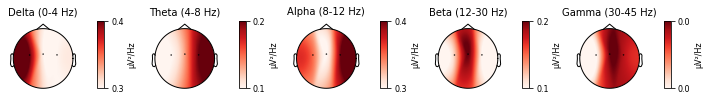

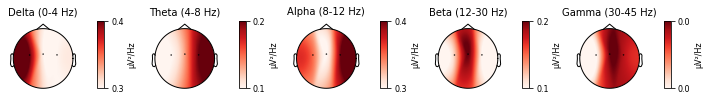

In [ ]:
epochs.plot_psd_topomap(ch_type='eeg', normalize=True)

    Using multitaper spectrum estimation with 7 DPSS windows


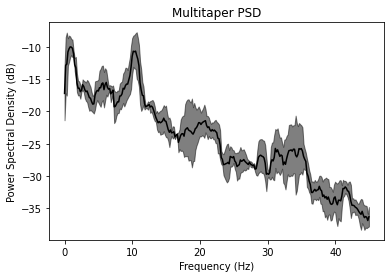

In [ ]:
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
f, ax = plt.subplots()
psds, freqs = psd_multitaper(epochs, fmin=0, fmax=45, n_jobs=1)
psds = 10 * np.log10(psds)  # convert to dB
psds_mean = psds.mean(0).mean(0)
psds_std = psds.mean(0).std(0)

ax.plot(freqs, psds_mean, color='k')
ax.fill_between(freqs, psds_mean - psds_std, psds_mean + psds_std,
                color='k', alpha=.5)
ax.set(title='Multitaper PSD', xlabel='Frequency (Hz)',
       ylabel='Power Spectral Density (dB)')
plt.show()

In [ ]:
freqs = np.logspace(*np.log10([1, 45]), num=8)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)

Applying baseline correction (mode: logratio)


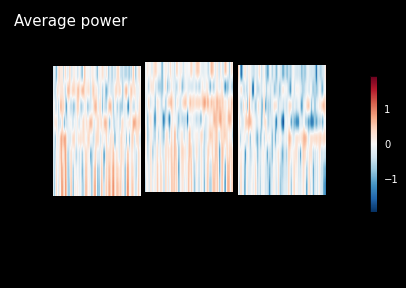

Applying baseline correction (mode: logratio)


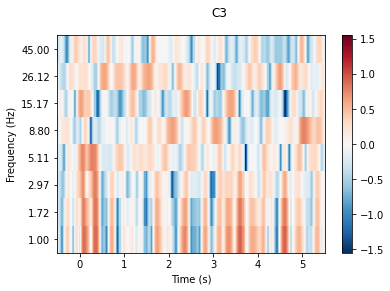

Applying baseline correction (mode: logratio)


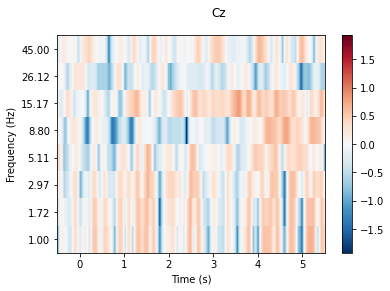

Applying baseline correction (mode: logratio)


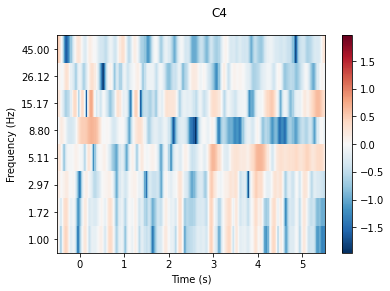

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)
Applying baseline correction (mode: logratio)


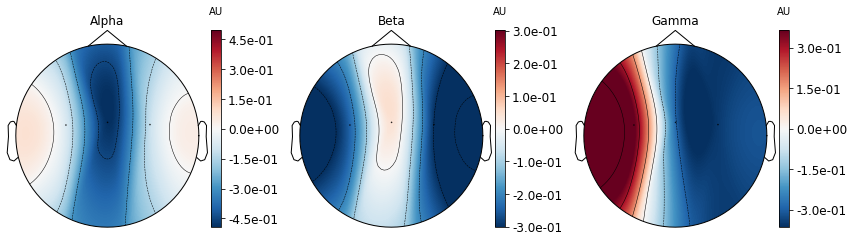

In [ ]:
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
power.plot([0], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[0])
power.plot([1], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[1])
power.plot([2], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[2])
fig, axis = plt.subplots(1, 3, figsize=(12, 8))
power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=8, fmax=12,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[0],
                   title='Alpha', show=False)
power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=13, fmax=25,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[1],
                   title='Beta', show=False)
power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=1.5, fmin=26, fmax=45,
                   baseline=(-0.5, 0), mode='logratio', axes=axis[2],
                   title='Gamma', show=False)
mne.viz.tight_layout()
plt.show()

No baseline correction applied


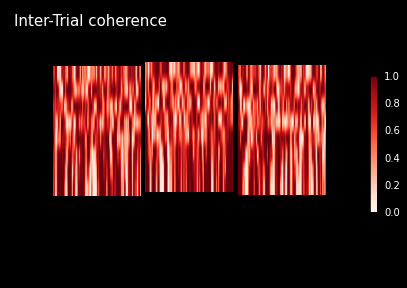

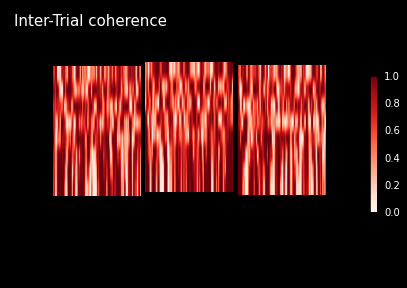

In [ ]:
itc.plot_topo(title='Inter-Trial coherence', vmin=0., vmax=1., cmap='Reds')

In [ ]:
from mne.time_frequency import tfr_multitaper
tfr = tfr_multitaper(epochs, freqs=freqs, n_cycles=freqs, use_fft=True,
                     return_itc=False, average=False, decim=2)

Not setting metadata


In [ ]:
pd.set_option('display.max_rows', 40)
df = tfr.to_data_frame(time_format=None)
df.to_csv('Cleaned_data.csv')

# Converting signals in Epochs

In [ ]:
from mne import Epochs, pick_types, events_from_annotations

In [ ]:
#epochs = mne.make_fixed_length_epochs(final_raw, duration = 0.126) # Dividing raw into epoch components
data = epochs.get_data()
print(data.shape)
print(data)

(1, 3, 897)
[[[ 0.01681944  0.02902624 -0.02224276 ... -0.02712576 -0.00515376
    0.02609674]
  [ 0.07414328  0.04435828  0.08781528 ... -0.03718472 -0.00837592
    0.01262028]
  [-0.07549624  0.03241476  0.09003176 ... -0.16387124 -0.14581124
   -0.15948124]]]


In [ ]:
output_data = pd.read_csv('y_train.csv', header=None)
output_data = np.array(output_data.loc[:,0].tolist())
print(output_data)

[1 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2 2 1 1 1 1 2 1 2 1 2 2 2 2 1 1 2 1 2 1 1 1
 1 1 2 2 2 2 1 1 2 1 2 2 1 2 2 2 1 2 2 1 2 2 1 2 1 2 1 2 2 2 2 2 1 2 1 2 1
 1 1 1 2 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 2 2 2 1 2 2 2 1 1 2 2
 2 1 1 2 1 1 1 2 1 2 1 1 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 2 1]


# Training epochs into Machine Learning models

In [ ]:
!pip install scikit-learn==1.0
!pip install mne_features

You should consider upgrading via the 'c:\users\91974\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\91974\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [ ]:
from mne_features.feature_extraction import extract_features
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

##### 1. Logistic Regression

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lr', LogisticRegression(random_state=42, solver='lbfgs'))]) 
selected_funcs = {'mean', 'ptp_amp', 'std'}
X_new = extract_features(data, 128, selected_funcs)
kf = KFold(n_splits=2, shuffle=True, random_state=6)
scores = cross_val_score(pipe, X_new, output_data, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

ValueError: Found input variables with inconsistent numbers of samples: [1, 140]